In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Users\SUPAT\anaconda3\Data Science Learning\4.Pandas\DataSet\Titanic - Train Data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Quiz9. ให้หาอัตราส่วนตั๋วโดยสารชั้น 1 2 3 และพล็อตเป็น Pie chart¶

<ipython-input-326-9d87018b682b>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(Ticket , labels = Class ,autopct='%1.0f%%' )


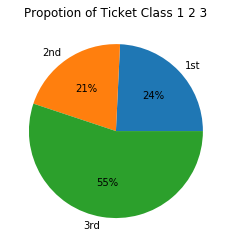

In [326]:
Result = df[['Pclass']].copy()
Result.replace({1:'1st',2:'2nd',3:'3rd'},inplace = True)
Result = Result.groupby('Pclass')[['Pclass']].count()

Ticket  = Result.values
Class = Result.index

plt.title('Propotion of Ticket Class 1 2 3')
plt.pie(Ticket , labels = Class ,autopct='%1.0f%%' )
plt.show()

## Quiz10. ให้หาอัตราส่วนของจุดหมายปลายทาง (Embark) และพล็อต Pie chat พร้อมทั้งให้ Queenstown เป็น explode

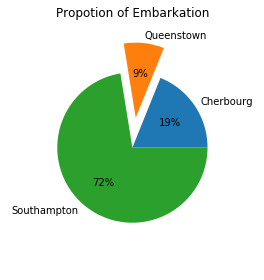

In [327]:
Result = df[['Embarked']].copy()
Result['Embarked'].replace({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'} , inplace = True)
Result = Result.groupby('Embarked')['Embarked'].count()


value = Result.values
Embark = Result.index
Explode = [0,0.3,0]

fig = plt.figure()
ax1 = fig.add_subplot(111,title = 'Propotion of Embarkation')
ax1.pie(value , labels = Embark , explode = Explode,radius = 0.75 , autopct='%1.0f%%')
plt.tight_layout()

## Quiz11. นำราคาตั๋วโดยสารทั้งหมดมาหา histogram

Text(0.5, 0, 'Price')

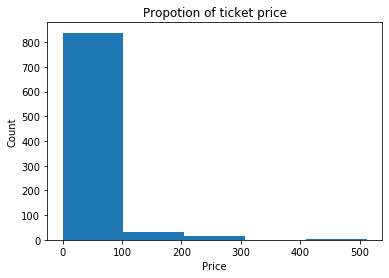

In [328]:
Result = df[['Fare']].copy()
Price = Result.values
plt.hist(Price , bins = 5)
plt.title('Propotion of ticket price')
plt.ylabel('Count')
plt.xlabel('Price')

## Quiz12.สร้างพล็อตแบบกระจายโดยให้อายุเป็นแกน X และ ราคาตั๋วโดยสารเป็นแกน Y

Text(0.5, 1.0, 'Correlation of Age and Fare')

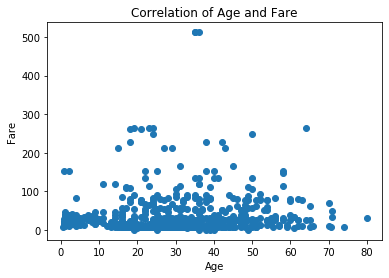

In [329]:
Result = df[['Age','Fare']].copy()

plt.scatter(df['Age'],df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation of Age and Fare')

## Quiz13.สร้าง bar chart โดยใช้ข้อมูลจากราคาตั๋วโดยสารเฉลี่ยแต่ละชั้น

Text(0, 0.5, 'Price')

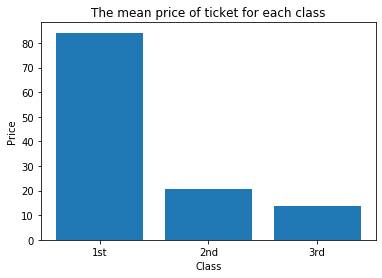

In [330]:
Result = df[['Pclass','Fare']].copy()
Result = Result.groupby('Pclass')[['Fare']].mean()
Result.rename(index ={1:'1st',2:'2nd',3:'3rd'},inplace = True)
Result

plt.bar(Result.index , Result['Fare'])
plt.title('The mean price of ticket for each class')
plt.xlabel('Class')
plt.ylabel('Price')

## Quiz14. สร้าง bar chart โดยใช้ข้อมูลจากราคาตั๋วโดยสารต่ออายุของผู้โดยสาร

Text(0, 0.5, 'price')

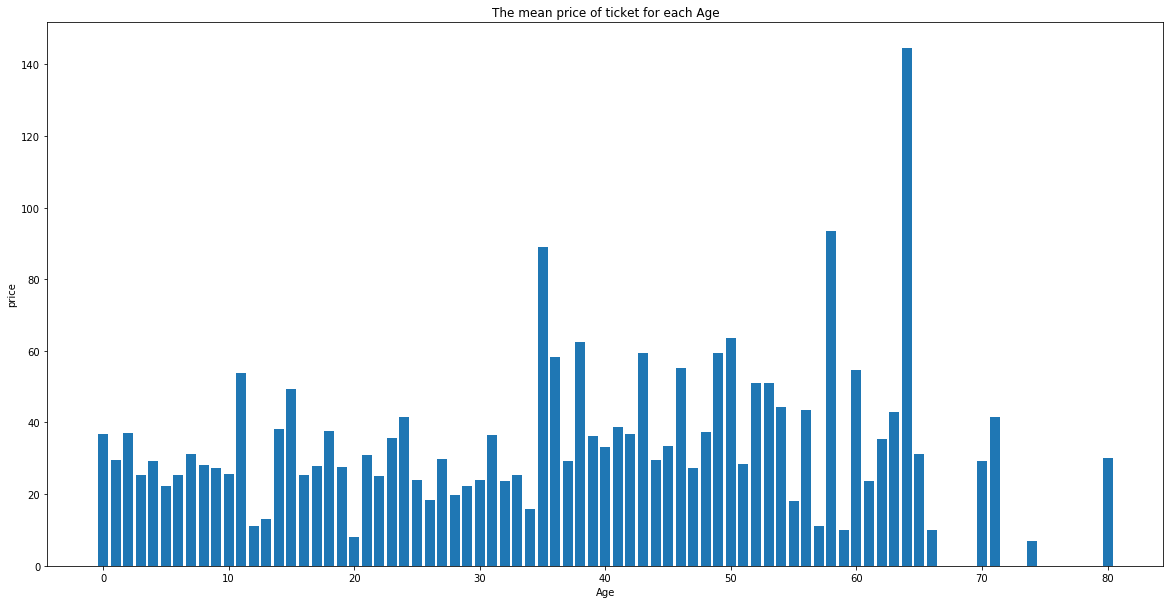

In [331]:
Result = df[['Age','Fare']].copy()
Result['Age'].fillna(Result['Age'].mean(),inplace = True)
Result['Age'] = Result['Age'].astype(int)
Result['Fare'] = Result['Fare'].astype(int)
Result = Result.groupby('Age')[['Fare']].mean()

plt.figure(figsize = [20,10])
plt.bar(Result.index , Result['Fare'])
plt.title('The mean price of ticket for each Age')
plt.xlabel('Age')
plt.ylabel('price')

## Quiz15. สร้าง bar chart โดยใช้ข้อมูลผู้ที่นามสกุลซ้ำกัน โดยความถี่เป็นแกน Y

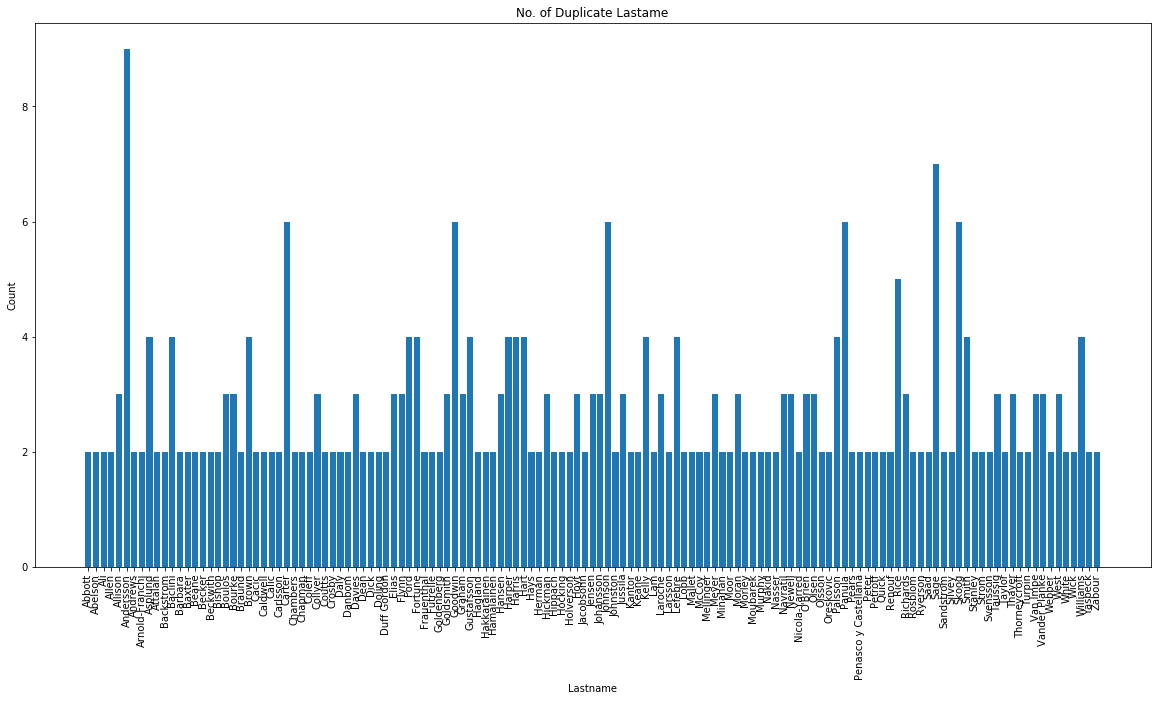

In [332]:
Result = df[['Name']].copy()
Result['Lastname'] = Result['Name'].str.split(',').str[0]
Result = Result.groupby('Lastname').count()
Result.columns = ['Count']
Result = Result[Result['Count']>1]

plt.figure(figsize = [20,10])
plt.bar(Result.index , Result['Count'])
plt.xticks(rotation=90)
plt.xlabel('Lastname')
plt.ylabel('Count')
plt.title('No. of Duplicate Lastame')
plt.show()

## Quiz16. (Optional) สร้างหลายกราฟในรูปเดียว โดยมีสองคอลัมน์ คอลัมน์แรกมีสามแถว คอลัมน์สองมีสองแถว พร้อมใส่ชื่อกราฟ รายละเอียดแต่ละแกน โดยสมการแต่ละกราฟสามารถคิดเองได้โดยใช้ข้อมูลจากไฟล์ titanic และไม่ต้องซ้ำกัน

<ipython-input-340-477a0ff5f809>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(Pie_Result.values)


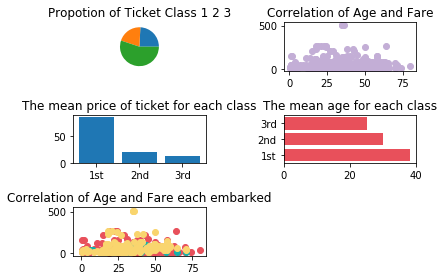

In [340]:
fig = plt.figure()

#ax1
Pie_Result = df[['Pclass']].copy()
Pie_Result.replace({1:'1st',2:'2nd',3:'3rd'},inplace = True)
Pie_Result = Pie_Result.groupby('Pclass')[['Pclass']].count()
ax1 = fig.add_subplot(321 , title = 'Propotion of Ticket Class 1 2 3')
ax1.pie(Pie_Result.values)

#ax2
ax2_Result = df[['Age','Fare']].copy()
ax2 = fig.add_subplot(322 , title = 'Correlation of Age and Fare')
ax2.scatter(ax2_Result['Age'],ax2_Result['Fare'] , c = '#c3aed6')

#ax3
ax3_Result = df[['Pclass','Fare']].copy()
ax3_Result = ax3_Result.groupby('Pclass')[['Fare']].mean()
ax3_Result.rename(index ={1:'1st',2:'2nd',3:'3rd'},inplace = True)
ax3 = fig.add_subplot(323 , title = 'The mean price of ticket for each class')
ax3.bar(ax3_Result.index , ax3_Result['Fare'])

#ax4
ax4_Result = df[['Pclass','Age']].copy()
ax4_Result = ax4_Result.groupby('Pclass')[['Age']].mean()
ax4_Result.rename(index ={1:'1st',2:'2nd',3:'3rd'},inplace = True)
ax4 = fig.add_subplot(324 , title = 'The mean age for each class')
ax4.barh(ax4_Result.index , ax4_Result['Age'] , color = '#e8505b')

#ax5
ax5_Result = df[['Age','Fare','Embarked']].copy()
ax5 = fig.add_subplot(325 , title = 'Correlation of Age and Fare each embarked')
ax5.scatter(ax5_Result[ax5_Result['Embarked']=='S']['Age'],ax5_Result[ax5_Result['Embarked']=='S']['Fare'] ,c = '#e8505b')
ax5.scatter(ax5_Result[ax5_Result['Embarked']=='Q']['Age'],ax5_Result[ax5_Result['Embarked']=='Q']['Fare'] ,c = '#14b1ab')
ax5.scatter(ax5_Result[ax5_Result['Embarked']=='C']['Age'],ax5_Result[ax5_Result['Embarked']=='C']['Fare'] ,c = '#f9d56e')

plt.tight_layout()